In [1]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1xI07t0VvlIiK6gF-RcHYxFRoayg9U0WU'}) 
downloaded.GetContentFile('ready.csv') 

In [1]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from sklearn import metrics


ModuleNotFoundError: No module named 'pydotplus'

In [2]:
x=pd.read_csv('final_data.csv')
x

,article_article,article_name,article_Material,article_Material_color,article_primary_stone,article_karat,article_Style,article_weight,article_price
0,NaN,30 mm Wide Hoop Earrings,Bronze,Yellow,No Stone,Measure 1 3/16 by 1/4 inches,3RGE1353/01,15.54 grams,$30
1,NaN,Oval Link Necklace,Bronze,Yellow,No Stone,Measures 18 inches in length,2RG15MA24/18,53.2 grams,$30
2,NaN,Cigar Band Ring,Bronze,Yellow,No Stone,18K Gold-Plated Bronze,601250104014,4RP1MR60/09,$35
3,NaN,Polished Link Ring,Bronze,Yellow,No Stone,18K Gold-Plated Bronze,601250104045,4RP1MR96/09,$35
4,NaN,Garibaldi Double Link Chain Necklace,Bronze,Yellow,No Stone,18-Inches in length,2RP1MGPA1/18,51.54 grams,$30
...,...,...,...,...,...,...,...,...,...
775,NaN,Pearl Pendant with Diamonds,Sterling Silver,White,Pearl,Crafted in Sterling Silver,4 ct,Created,$35
776,NaN,1/2 ct White Sapphire Open Heart Pendant,Sterling Silver,Rose,Sapphire,14K Rose Gold-Plated Sterling Silver,Pendants,Women's,$35
777,NaN,1/4 ct Diamond Bypass Ring,Sterling Silver,White,Diamond,"I-J Color, I2-I3 Clarity",I-J,Not-Treated,$98
778,NaN,3 ct Peridot Stud Earrings,Silver and Gold,Two-Tone,Peridot,Measure 3/8 by 3/8 inches,Studs,Women's,$77




---

# **Classification**



---



In [5]:
# load dataset
data = pd.read_csv("ready.csv")
data.columns

Index(['Unnamed: 0', 'Type', 'article_Material', 'article_Material_color',
       'article_primary_stone', 'article_weight', 'price_range'],
      dtype='object')

In [6]:


#encoding categorical values to integer using LabelEncoder()

inputs=data.drop( ['Unnamed: 0','article_Material_color','price_range'],axis=1) #Features set
target=data.price_range #target set

label_encoder = LabelEncoder()
inputs.iloc[:,0] = label_encoder.fit_transform(inputs.iloc[:,0]).astype('int')
inputs.iloc[:,1] = label_encoder.fit_transform(inputs.iloc[:,1]).astype('int')
inputs.iloc[:,2] = label_encoder.fit_transform(inputs.iloc[:,2]).astype('int')
inputs.iloc[:,3] = label_encoder.fit_transform(inputs.iloc[:,3]).astype('int')






In [ ]:
inputs

In [9]:
#featre scaling because some methods require this step
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
inputs = sc.fit_transform(inputs)


In [8]:
inputs

array([[-0.67467764, -1.47224137,  0.33884048,  1.42176343],
       [ 0.15129814, -1.47224137,  0.33884048,  1.73274122],
       [ 1.80324969, -1.47224137,  0.33884048,  0.51104277],
       ...,
       [ 1.80324969,  2.1048198 , -1.07775437,  0.51104277],
       [-0.67467764,  0.91246608,  1.14832325,  0.51104277],
       [-1.50065341,  2.1048198 ,  0.94595256,  0.51104277]])

In [20]:


#Splitting data into train (80%) and test sets (20%)

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=1) # 80% training and 20% test

In [21]:
#Create a list with features selected based on the Backward Elimination 
feature_cols=['Type', 'article_Material','article_primary_stone', 'article_weight']


In [22]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)



In [23]:
#Classification Accuracy: Overall, how often is the classifier correct?

print("Classification Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Classification Error:",1 - metrics.accuracy_score(y_test, y_pred))

#Sensitivity: When the actual value is positive, how often is the prediction correct?
#Something we want to maximize
#How "sensitive" is the classifier to detecting positive instances?
#Also known as "True Positive Rate" or "Recall"

print('Sensitivity:',metrics.recall_score(y_test, y_pred,average='weighted'))

#Precision: When a positive value is predicted, how often is the prediction correct?
#How "precise" is the classifier when predicting positive instances?
print('Precision:',metrics.precision_score(y_test, y_pred,average='weighted'))
print('f1_score:',metrics.f1_score(y_test, y_pred, zero_division=1,average='weighted'))

Classification Accuracy: 0.7702702702702703
Classification Error: 0.22972972972972971
Sensitivity: 0.7702702702702703
Precision: 0.7813169739640328
f1_score: 0.7646903263341619


In [24]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      Range1       0.87      0.79      0.83        33
      Range2       0.68      0.66      0.67        35
      Range3       0.81      0.90      0.85        69
      Range4       0.20      0.25      0.22         4
      Range5       1.00      0.29      0.44         7

    accuracy                           0.77       148
   macro avg       0.71      0.58      0.60       148
weighted avg       0.78      0.77      0.76       148



In [ ]:
#Plot the tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=target)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')

True

In [63]:
#LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB as gnb
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))
y_pred2 = lda.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy of LDA classifier on training set: 0.57
Accuracy of LDA classifier on test set: 0.51
Accuracy: 0.5135135135135135


In [64]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Show accuracy
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

y_pred1 = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

#Print LogisticRegression report
report = classification_report(y_test, y_pred1)
print(report)

Accuracy of Logistic regression classifier on training set: 0.57
Accuracy of Logistic regression classifier on test set: 0.51
Accuracy: 0.5067567567567568
              precision    recall  f1-score   support

      Range1       0.00      0.00      0.00        33
      Range2       0.40      0.54      0.46        35
      Range3       0.55      0.81      0.66        69
      Range4       0.00      0.00      0.00         4
      Range5       0.00      0.00      0.00         7

    accuracy                           0.51       148
   macro avg       0.19      0.27      0.22       148
weighted avg       0.35      0.51      0.42       148



In [30]:
# Support Vector Machine
from sklearn.svm import SVC
svm= SVC(kernel='linear', C=0.025, random_state=101)
svm.fit(X_train,y_train)
y_pred6=svm.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))


Accuracy: 0.527027027027027


**RandomForestClassifier**

In [25]:
 
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train)

y_pred5=clf2.predict(X_test)


In [26]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))

#Classification Error: Overall, how often is the classifier incorrect?
print("Classification Error:",1 - metrics.accuracy_score(y_test, y_pred5))


#Sensitivity: When the actual value is positive, how often is the prediction correct?
#Something we want to maximize
#How "sensitive" is the classifier to detecting positive instances?
#Also known as "True Positive Rate" or "Recall"

print('Sensitivity:',metrics.recall_score(y_test, y_pred5,average='weighted'))

#Precision: When a positive value is predicted, how often is the prediction correct?
#How "precise" is the classifier when predicting positive instances?
print('Precision:',metrics.precision_score(y_test, y_pred5,average='weighted'))
print('f1_score:',metrics.f1_score(y_test, y_pred5, zero_division=1,average='weighted'))

Accuracy: 0.7905405405405406
Classification Error: 0.20945945945945943
Sensitivity: 0.7905405405405406
Precision: 0.8062351596834356
f1_score: 0.7863246315672447


In [28]:
#Print RandomForestClassifier report
report = classification_report(y_test, y_pred5)
print(report)

              precision    recall  f1-score   support

      Range1       0.90      0.79      0.84        33
      Range2       0.73      0.69      0.71        35
      Range3       0.82      0.93      0.87        69
      Range4       0.17      0.25      0.20         4
      Range5       1.00      0.29      0.44         7

    accuracy                           0.79       148
   macro avg       0.72      0.59      0.61       148
weighted avg       0.81      0.79      0.79       148



In [ ]:
#Print Support Vector Machine Report
report = classification_report(y_test, y_pred6)
print(report)

LR: 0.578872 (0.057688)
LDA: 0.558504 (0.051449)
KNN: 0.706400 (0.056270)
CART: 0.709673 (0.062716)
Rforest: 0.714757 (0.062916)
NB: 0.235973 (0.050434)
SVM: 0.663764 (0.056570)


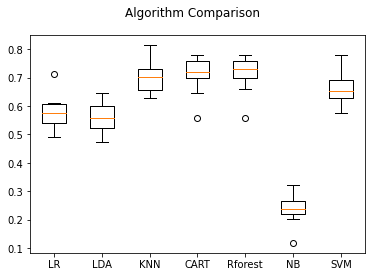

In [29]:

# Compare Algorithms
import pandas
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Rforest', RandomForestClassifier(n_estimators=100, criterion='entropy')))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
seed=8
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()